In [1]:
!pwd

/Users/macbook/divtel


In [2]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
%matplotlib inline
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt
import sys
from ipywidgets import interactive, FloatSlider, interact, fixed
from divtel import *
import copy
import astropy.units as u
from astropy.coordinates import SkyCoord
from astroplan.plots import plot_sky
from astroplan import FixedTarget
#from . import utils
#from .const import COLORS
#from . import pointing

from matplotlib.transforms import Affine2D
from astropy.visualization.wcsaxes import SphericalCircle

import healpy as hp
import tqdm

#!jupyter labextension install @jupyter-widgets/jupyterlab-manager

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


## LOAD CTA CONFIG

In [3]:
cta = CTA_Info('south')

Observer         :  CTA South
Location         :  Paranal , (1946.635798, -5467.63394562, -2642.49852123) km
Observation time :  2025-02-06T15:00:46.773


In [4]:
# Note that if the radius is in meters, 
# you can set LoadConfig(file, radius="meters")
# defalut is in degrees

array = LoadConfig("/Users/macbook/divtel/Paranal_only_SST.txt", frame=cta)


## Check configuration table

In [5]:
array.table.units = "deg"
array.table


id,x,y,z,az,alt,zn,focal,radius,fov,p_x,p_y,p_z,d_tel
,m,m,m,deg,deg,deg,m,deg,deg2,,,,m
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,199.0,0.0,16.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,200.19
2,-230.0,0.0,22.75,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,229.36
3,-249.0,-325.0,40.75,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,409.12
4,-249.0,325.0,17.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,409.16
5,-249.0,-577.0,54.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,628.62
6,-249.0,577.0,8.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,628.51
7,-220.0,-797.0,68.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,827.51
8,-220.0,797.0,10.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,826.84


In [6]:
table=array.table

## Check the telescope spatial distribution
This is useful to pick the groups

In [7]:
array.table

id,x,y,z,az,alt,zn,focal,radius,fov,p_x,p_y,p_z,d_tel
,m,m,m,deg,deg,deg,m,deg,deg2,,,,m
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,199.0,0.0,16.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,200.19
2,-230.0,0.0,22.75,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,229.36
3,-249.0,-325.0,40.75,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,409.12
4,-249.0,325.0,17.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,409.16
5,-249.0,-577.0,54.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,628.62
6,-249.0,577.0,8.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,628.51
7,-220.0,-797.0,68.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,827.51
8,-220.0,797.0,10.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,826.84


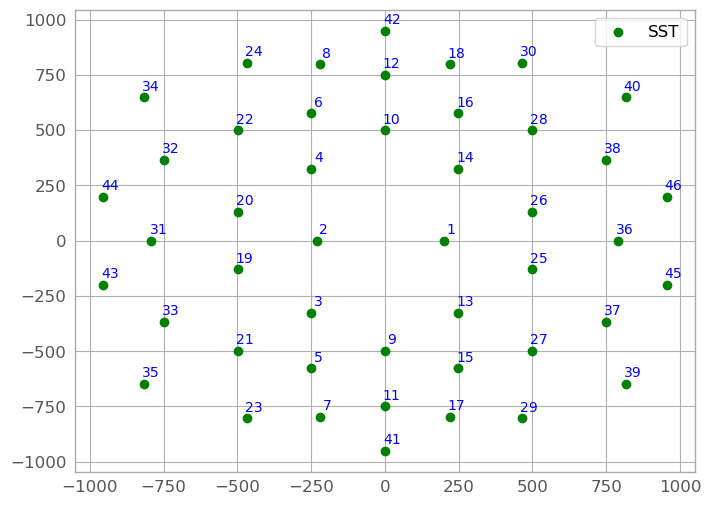

In [8]:
# Loop through all the telescopes
#for fov in array.table["fov"]:
#    print(fov)
colors = [
    'lightseagreen' if np.isclose(fov, 14.5356) else
    'blueviolet' if np.isclose(fov, 46.707) else 
    'green' if np.isclose(fov, 62.462) else
    'red'  # Default color if none of the conditions match
    for fov in array.table["fov"]
]
fov_labels = {
    'lightseagreen': 'LST',
    'blueviolet': 'MST',
    'green': 'SST'
}
for i in range(len(array.table)):
    plt.scatter(array.table['x'][i], array.table['y'][i], c=colors[i], label=fov_labels[colors[i]])

    # Annotate each point with the telescope ID
    #matplotlib.pyplot.annotate(text, xy, xytext=None, xycoords='data', textcoords=None, arrowprops=None, annotation_clip=None, **kwargs)
#Annotate the point xy with text text.
#In the simplest form, the text is placed at xy.
    plt.annotate(str(array.table["id"][i]),
                 (array.table['x'][i], array.table['y'][i]),  # Point position
                 textcoords="offset points",  # Text position relative to the point
                 xytext=(5, 5),  # Offset in pixels (to avoid overlapping the point)
                 ha='center', fontsize=10, color='blue')
handles, labels = plt.gca().get_legend_handles_labels()
#handles, labels like this is doing
    #plt.gca() gets the current Axes object, which is where your plot is
    #.get_legend_handles_labels()
        #handles: Returns a list of the graphical elements (e.g., lines, scatter plot points) that would appear in the legend.
        # labels: Returns the text labels associated with each graphical element in handles

by_label = dict(zip(labels, handles))  # Remove duplicate labels, the dictionary by the structure takes out the double 
plt.legend(by_label.values(), by_label.keys())
#by_label.values This is pulling out the unique graphical elements
# by_label.keys  This is retrieving the unique text 
plt.savefig("./different_telescopes.png", dpi=300, bbox_inches="tight")
plt.show() 

## Check the hyper field of view (hFoV)

This is the whole telescope array hFoV maybe? (ask)

In [9]:
array.hFoV(m_cut=3) 

46it [00:06,  6.86it/s]


(62.238869377690584, 46.0)

In [10]:
#array.hFoV(m_cut=3)

## Grouping telescopes

In [11]:

sub_groups = {'1':[44,33,20], 
             '2':[43,3,21],
              '3':[35,23,15],
              '4':[10,34,24],
              '5':[19,22,14,13],
              '6':[31,6,2],
              '7':[7,12,39],
              '8':[41,4,18],
              '9':[8,16,26],
              '10':[5,27,17],
              '11':[9,30,40],
              '12':[11,36,37],
              '13':[32,42,28],
              '14':[1,38,45],
              '15':[25,29,46]
             }
sub_groups_2 = {'1':[44,35,5], 
             '2':[43,32,24],
              '3':[34,42,3],
              '4':[10,20,28],
              '5':[19,22,14,13],
              '6':[31,6,2],
              '7':[7,12,39],
              '8':[41,4,18],
              '9':[8,16,26],
              '10':[33,15,23],
              '11':[9,30,40],
              '12':[11,36,37],
              '13':[17,21,27],
              '14':[1,38,45],
              '15':[25,29,46]
             }

sub_group_2_div = {'1':[24,12,30,42,8,18], 
             '2':[44,32,34],
              '3':[43,33,35],
              '4':[23,41,29,11,7,17],
              '5':[37,39,45],
              '6':[38,40,46],
              '7':[1,25,26],
              '8':[27,28,36],
              '9':[6,10,16],
              '10':[5,9,15],
              '11':[3,4,13,14],
              '12':[2,19,20],
              '13':[21,22,31]
            
    
}
sub_group_2_div_2 = {'1':[24,12,30,42,8,18], 
             '2':[44,32,34],
              '3':[43,33,35],
              '4':[23,41,29,11,7,17],
              '5':[37,39,45],
              '6':[38,40,46],
              '7':[1,2,9,10],
              '8':[16,26,28],
              '9':[15,25,27],
              '10':[13,14,36],
              '11':[5,19,21],
              '12':[6,20,22],
              '13':[3,4,31]
            
    
}


In [12]:
def compute_center_of_gravity(group):
    x, y, z = group['x'], group['y'], group['z']
    cog_x = round(np.mean(x),2)
    cog_y = round(np.mean(y),2)
    cog_z = round(np.mean(z),2)
    return cog_x, cog_y, cog_z

# Function to create new telescope list with center of gravity
def create_new_group_list(tel_group):
    new_telescopes = []
    for group in tel_group.groups:
        print(tel_group.groups)
        print (group['focal'][0],round(group['radius'][0],2))
        #id_ = group["id"][0]
        cog = compute_center_of_gravity(group)
        focal, fov = group['focal'][0], round(group['radius'][0],2)  # Assuming same within a group
        new_telescopes.append([*cog, focal, fov])
    return new_telescopes


In [13]:
tel_group_2, labels_2, number_of_telescopes_subarray_2 =array.group_by(sub_groups_2)
#tel_group_3, labels_3 = group_by(array, group=only_MST)

In [14]:
tel_group, labels, number_of_telescopes_subarray_1 =array.group_by(sub_groups)

In [15]:
tel_group_3, labels_3, number_of_telescopes_subarray_3 =array.group_by(sub_group_2_div)
tel_group_4, labels_4, number_of_telescopes_subarray_4 =array.group_by(sub_group_2_div_2)

In [16]:
# Step 2: Create new telescope list with center of gravity
new_telescopes = create_new_group_list(tel_group)
new_telescopes_2 = create_new_group_list(tel_group_2)
new_telescopes_3 = create_new_group_list(tel_group_3)
new_telescopes_4 = create_new_group_list(tel_group_4)
#Why are you creating an extra telescope?


<TableGroups indices=[ 0  3  6  9 12 16 19 22 25 28 31 34 37 40 43 46]>
5.6 4.45
<TableGroups indices=[ 0  3  6  9 12 16 19 22 25 28 31 34 37 40 43 46]>
5.6 4.45
<TableGroups indices=[ 0  3  6  9 12 16 19 22 25 28 31 34 37 40 43 46]>
5.6 4.45
<TableGroups indices=[ 0  3  6  9 12 16 19 22 25 28 31 34 37 40 43 46]>
5.6 4.45
<TableGroups indices=[ 0  3  6  9 12 16 19 22 25 28 31 34 37 40 43 46]>
5.6 4.45
<TableGroups indices=[ 0  3  6  9 12 16 19 22 25 28 31 34 37 40 43 46]>
5.6 4.45
<TableGroups indices=[ 0  3  6  9 12 16 19 22 25 28 31 34 37 40 43 46]>
5.6 4.45
<TableGroups indices=[ 0  3  6  9 12 16 19 22 25 28 31 34 37 40 43 46]>
5.6 4.45
<TableGroups indices=[ 0  3  6  9 12 16 19 22 25 28 31 34 37 40 43 46]>
5.6 4.45
<TableGroups indices=[ 0  3  6  9 12 16 19 22 25 28 31 34 37 40 43 46]>
5.6 4.45
<TableGroups indices=[ 0  3  6  9 12 16 19 22 25 28 31 34 37 40 43 46]>
5.6 4.45
<TableGroups indices=[ 0  3  6  9 12 16 19 22 25 28 31 34 37 40 43 46]>
5.6 4.45
<TableGroups indices=[ 0  3 

In [17]:
# Define the file path where you want to save the output
output_file_path = './SST_file_1.txt'

# Open the file in write mode
with open(output_file_path, 'w') as file:
    
    # Write a header
    #file.write("Group ID, X_Center, Y_Center, Z_Center, Focal Length, FOV\n")
    
    # Loop through all new telescopes (grouped telescopes)
    for i, telescope in enumerate(new_telescopes):
        # Assuming telescope is a list like [x_center, y_center, z_center, focal_length, fov]
        values = ' '.join(map(str, telescope))  # Convert all elements to string
        # Write the data to the file
        #print(values)
        file.write(f"{values}\n")

print(f"New telescope data has been written to {output_file_path}")


New telescope data has been written to ./SST_file_1.txt


In [18]:
print(list(enumerate(new_telescopes_2)))

[(0, [-673.67, -342.0, 50.42, 5.6, 4.45]), (1, [-723.0, 324.0, 24.58, 5.6, 4.45]), (2, [-355.33, 424.33, 26.42, 5.6, 4.45]), (3, [0.0, 376.0, 16.58, 5.6, 4.45]), (4, [-125.0, 92.25, 21.38, 5.6, 4.45]), (5, [-423.33, 192.33, 20.42, 5.6, 4.45]), (6, [198.67, -232.0, 40.75, 5.6, 4.45]), (7, [-9.67, 57.33, 39.25, 5.6, 4.45]), (8, [176.0, 501.33, 12.42, 5.6, 4.45]), (9, [-321.67, -582.67, 57.25, 5.6, 4.45]), (10, [427.33, 317.67, 31.92, 5.6, 4.45]), (11, [512.67, -372.0, 23.58, 5.6, 4.45]), (12, [73.33, -598.33, 48.58, 5.6, 4.45]), (13, [634.0, 56.0, 10.08, 5.6, 4.45]), (14, [640.0, -245.0, 23.92, 5.6, 4.45])]


In [19]:
# Define the file path where you want to save the output
output_file_path_2 = './SST_2.txt'

# Open the file in write mode
with open(output_file_path_2, 'w') as file:
    
    # Write a header
    #file.write("Group ID, X_Center, Y_Center, Z_Center, Focal Length, FOV\n")
    
    # Loop through all new telescopes (grouped telescopes)
    for i, telescope in enumerate(new_telescopes_2):
        # Assuming telescope is a list like [x_center, y_center, z_center, focal_length, fov]
        values = ' '.join(map(str, telescope))  # Convert all elements to string
        # Write the data to the file
        #print(values)
        file.write(f"{values}\n")

print(f"New telescope data has been written to {output_file_path_2}")


New telescope data has been written to ./SST_2.txt


In [20]:
# Define the file path where you want to save the output
output_file_path_3 = './SST_2_divergences.txt'

# Open the file in write mode
with open(output_file_path_3, 'w') as file:
    
    # Write a header
    #file.write("Group ID, X_Center, Y_Center, Z_Center, Focal Length, FOV\n")
    
    # Loop through all new telescopes (grouped telescopes)
    for i, telescope in enumerate(new_telescopes_3):
        # Assuming telescope is a list like [x_center, y_center, z_center, focal_length, fov]
        values = ' '.join(map(str, telescope))  # Convert all elements to string
        # Write the data to the file
        #print(values)
        file.write(f"{values}\n")

print(f"New telescope data has been written to {output_file_path_3}")


New telescope data has been written to ./SST_2_divergences.txt


In [21]:
# Define the file path where you want to save the output
output_file_path_4 = './SST_2_divergences_try_2.txt'

# Open the file in write mode
with open(output_file_path_4, 'w') as file:
    
    # Write a header
    #file.write("Group ID, X_Center, Y_Center, Z_Center, Focal Length, FOV\n")
    
    # Loop through all new telescopes (grouped telescopes)
    for i, telescope in enumerate(new_telescopes_4):
        # Assuming telescope is a list like [x_center, y_center, z_center, focal_length, fov]
        values = ' '.join(map(str, telescope))  # Convert all elements to string
        # Write the data to the file
        #print(values)
        file.write(f"{values}\n")

print(f"New telescope data has been written to {output_file_path_4}")


New telescope data has been written to ./SST_2_divergences_try_2.txt


In [22]:
## First to start understanding what is going on I wanted to graph in the 4 plots together 

FoV_array

## PENSAR COMO AUTOMIZAR LO SIGUIENTE EL FOV CHE STUDIO TIENE QUE SER SI O SI DEL FULL ARRAY CON EL MINIMO DEL ARRAY DE TELESCOPIOS QUE TENGO PRARA PODER CONFRONTAR MEJOR. En cambio no poner ningun limite para los subarrays

In [24]:
number_of_telescopes_subarray_1

[3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]

## MULTIPLE DIVERGENCES

SST configuration with two subarrays

In [25]:
array_SST_2_diff_div= LoadConfig('./SST_2_divergences.txt', frame=cta, pointing2src=True)

In [26]:
array_SST_2_diff_div_try_2 = LoadConfig('./SST_2_divergences_try_2.txt', frame=cta, pointing2src=True)

In [27]:
array_SST_2_diff_div.table.units = "deg"
array_SST_2_diff_div.table
array_SST_2_diff_div_try_2.table.units = "deg"
array_SST_2_diff_div_try_2.table

id,x,y,z,az,alt,zn,focal,radius,fov,p_x,p_y,p_z,d_tel
,m,m,m,deg,deg,deg,m,deg,deg2,,,,m
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,0.0,816.83,21.83,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,816.85
2,-840.0,404.67,16.75,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,931.85
3,-840.0,-404.67,55.92,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,932.21
4,0.0,-816.83,65.42,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,817.70
5,839.67,-404.67,17.75,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,932.76
6,839.67,404.67,10.08,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,932.87
7,-7.75,0.0,22.5,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,8.77
8,415.67,402.0,12.42,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,578.95


In [28]:
number_of_telescopes_subarray_3

[6, 3, 3, 6, 3, 3, 3, 3, 3, 3, 4, 3, 3]

## Here I am trying to find the multiplicity for each subarray division 

In [29]:
number_of_telescopes_subarray_4

[6, 3, 3, 6, 3, 3, 4, 3, 3, 3, 3, 3, 3]

In [30]:
number_of_telescopes_subarray_3

[6, 3, 3, 6, 3, 3, 3, 3, 3, 3, 4, 3, 3]

In [31]:
table_SST_conv = []
number_of_telescopes_subarray_3_first_half=[] #Because now we have to change the place 
table_SST= array_SST_2_diff_div.table
# Append the columns for LST so I know what to get or expect
table_SST_conv.append(table_SST['x'])
table_SST_conv.append(table_SST['y'])
table_SST_conv.append(table_SST['z'])
table_SST_conv.append(table_SST['focal'])
table_SST_conv.append(table_SST['radius'])
table_SST_conv.append(table_SST['fov'])

# Initialize sub_config and other variables
sub_config = []
telescopes = [1, 2,3,4,5,6]  # Telescope indices
# Loop through the telescopes so I can write them in a file
for tel in telescopes:
    # Putting it tel-1 because the first column we had the index
    sub_config.append([col[tel - 1] for col in table_SST_conv])
    ## Here I am putting the multiplicity where it should be 
    ## I am trying to improve this so it does that in a function so it would be clearer 
    number_of_telescopes_subarray_3_first_half.append(number_of_telescopes_subarray_3[tel-1])


# Print the result for verification
print(sub_config)
print(number_of_telescopes_subarray_3_first_half)

[[0.0, 816.83, 21.83, 5.6, 4.450000000000001, 62.46242685852285], [-840.0, 404.67, 16.75, 5.6, 4.450000000000001, 62.46242685852285], [-840.0, -404.67, 55.92, 5.6, 4.450000000000001, 62.46242685852285], [0.0, -816.83, 65.42, 5.6, 4.450000000000001, 62.46242685852285], [839.67, -404.67, 17.75, 5.6, 4.450000000000001, 62.46242685852285], [839.67, 404.67, 10.08, 5.6, 4.450000000000001, 62.46242685852285]]
[6, 3, 3, 6, 3, 3]


In [32]:
table_SST_conv_2 = []
table_SST_2= array_SST_2_diff_div_try_2.table
number_of_telescopes_subarray_4_first_half=[]
# Append the columns for LST so I know what to get or expect
table_SST_conv_2.append(table_SST_2['x'])
table_SST_conv_2.append(table_SST_2['y'])
table_SST_conv_2.append(table_SST_2['z'])
table_SST_conv_2.append(table_SST_2['focal'])
table_SST_conv_2.append(table_SST_2['radius'])
table_SST_conv_2.append(table_SST_2['fov'])

# Initialize sub_config and other variables
sub_config_3 = []
telescopes = [1, 2,3,4,5,6]  # Telescope indices
# Loop through the telescopes so I can write them in a file
for tel in telescopes:
    # Putting it tel-1 because the first column we had the index
    sub_config_3.append([col[tel - 1] for col in table_SST_conv_2])
    number_of_telescopes_subarray_4_first_half.append(number_of_telescopes_subarray_4[tel-1])


# Print the result for verification
print(sub_config_3)
print(number_of_telescopes_subarray_4_first_half)

[[0.0, 816.83, 21.83, 5.6, 4.450000000000001, 62.46242685852285], [-840.0, 404.67, 16.75, 5.6, 4.450000000000001, 62.46242685852285], [-840.0, -404.67, 55.92, 5.6, 4.450000000000001, 62.46242685852285], [0.0, -816.83, 65.42, 5.6, 4.450000000000001, 62.46242685852285], [839.67, -404.67, 17.75, 5.6, 4.450000000000001, 62.46242685852285], [839.67, 404.67, 10.08, 5.6, 4.450000000000001, 62.46242685852285]]
[6, 3, 3, 6, 3, 3]


In [33]:
table_SST_div = []
table_SST= array_SST_2_diff_div.table
number_of_telescopes_subarray_3_second_half=[]
# Append the columns for LST so I know what to get or expect
table_SST_div.append(table_SST['x'])
table_SST_div.append(table_SST['y'])
table_SST_div.append(table_SST['z'])
table_SST_div.append(table_SST['focal'])
table_SST_div.append(table_SST['radius'])
table_SST_div.append(table_SST['fov'])

# Initialize sub_config and other variables
sub_config_2= []
telescopes = [7,8,9,10,11,12,13]  # Telescope indices
# Loop through the telescopes so I can write them in a file
for tel in telescopes:
    # Adjust for 1-based indexing in telescopes to 0-based indexing in Python
    sub_config_2.append([col[tel - 1] for col in table_SST_div])
    number_of_telescopes_subarray_3_second_half.append(number_of_telescopes_subarray_3[tel-1])


# Print the result for verification
print(sub_config_2)
print(number_of_telescopes_subarray_3_second_half)

[[399.0, 0.0, 12.58, 5.6, 4.450000000000001, 62.46242685852285], [596.0, 0.0, 14.92, 5.6, 4.450000000000001, 62.46242685852285], [0.0, 551.0, 12.42, 5.6, 4.450000000000001, 62.46242685852285], [0.0, -551.0, 45.08, 5.6, 4.450000000000001, 62.46242685852285], [0.0, 0.0, 25.5, 5.6, 4.450000000000001, 62.46242685852285], [-409.33, 0.0, 27.42, 5.6, 4.450000000000001, 62.46242685852285], [-596.33, 0.0, 33.25, 5.6, 4.450000000000001, 62.46242685852285]]
[3, 3, 3, 3, 4, 3, 3]


In [34]:
table_SST_div_2 = []
table_SST_2= array_SST_2_diff_div_try_2.table
number_of_telescopes_subarray_4_second_half=[]
# Append the columns for LST so I know what to get or expect
table_SST_div_2.append(table_SST_2['x'])
table_SST_div_2.append(table_SST_2['y'])
table_SST_div_2.append(table_SST_2['z'])
table_SST_div_2.append(table_SST_2['focal'])
table_SST_div_2.append(table_SST_2['radius'])
table_SST_div_2.append(table_SST_2['fov'])

# Initialize sub_config and other variables
sub_config_4= []
telescopes = [7,8,9,10,11,12,13]  # Telescope indices
# Loop through the telescopes so I can write them in a file
for tel in telescopes:
    # Adjust for 1-based indexing in telescopes to 0-based indexing in Python
    sub_config_4.append([col[tel - 1] for col in table_SST_div_2])
    number_of_telescopes_subarray_4_second_half.append(number_of_telescopes_subarray_4[tel-1])


# Print the result for verification
print(sub_config_4)
print(number_of_telescopes_subarray_4_second_half)

[[-7.75, 0.0, 22.5, 5.6, 4.450000000000001, 62.46242685852285], [415.67, 402.0, 12.42, 5.6, 4.450000000000001, 62.46242685852285], [415.67, -402.0, 27.92, 5.6, 4.450000000000001, 62.46242685852285], [429.33, 0.0, 16.08, 5.6, 4.450000000000001, 62.46242685852285], [-415.67, -402.0, 48.25, 5.6, 4.450000000000001, 62.46242685852285], [-415.67, 402.0, 15.58, 5.6, 4.450000000000001, 62.46242685852285], [-429.67, 0.0, 29.42, 5.6, 4.450000000000001, 62.46242685852285]]
[4, 3, 3, 3, 3, 3, 3]


In [35]:
# Define the file path where you want to save the output
output_file_path_3 = './SST_conv.txt'

# Open the file in write mode
with open(output_file_path_3, 'w') as file:
    
    # Write a header
    #file.write("Group ID, X_Center, Y_Center, Z_Center, Focal Length, FOV\n")
    
    # Loop through all new telescopes (grouped telescopes)
   for telescope in sub_config:
        # Assuming each telescope in sub_config is a list like [x_center, y_center, z_center, focal_length, fov]
        values = ' '.join(map(str, telescope))  # Convert all elements to string
        file.write(f"{values}\n")  # Write each row of telescope data

print(f"New telescope data has been written to {output_file_path_3}")
# Define the file path where you want to save the output
output_file_path_4 = './SST_div.txt'

# Open the file in write mode
with open(output_file_path_4, 'w') as file:
    
    # Write a header
    #file.write("Group ID, X_Center, Y_Center, Z_Center, Focal Length, FOV\n")
    
    # Loop through all new telescopes (grouped telescopes)
   for telescope in sub_config_2:
        # Assuming each telescope in sub_config is a list like [x_center, y_center, z_center, focal_length, fov]
        values = ' '.join(map(str, telescope))  # Convert all elements to string
        file.write(f"{values}\n")  # Write each row of telescope data

print(f"New telescope data has been written to {output_file_path_4}")

New telescope data has been written to ./SST_conv.txt
New telescope data has been written to ./SST_div.txt


In [36]:
# Define the file path where you want to save the output
output_file_path_5 = './SST_conv_2.txt'

# Open the file in write mode
with open(output_file_path_5, 'w') as file:
    
    # Write a header
    #file.write("Group ID, X_Center, Y_Center, Z_Center, Focal Length, FOV\n")
    
    # Loop through all new telescopes (grouped telescopes)
   for telescope in sub_config_3:
        # Assuming each telescope in sub_config is a list like [x_center, y_center, z_center, focal_length, fov]
        values = ' '.join(map(str, telescope))  # Convert all elements to string
        file.write(f"{values}\n")  # Write each row of telescope data

print(f"New telescope data has been written to {output_file_path_5}")
# Define the file path where you want to save the output
output_file_path_6 = './SST_div_2.txt'

# Open the file in write mode
with open(output_file_path_6, 'w') as file:
    
    # Write a header
    #file.write("Group ID, X_Center, Y_Center, Z_Center, Focal Length, FOV\n")
    
    # Loop through all new telescopes (grouped telescopes)
   for telescope in sub_config_4:
        # Assuming each telescope in sub_config is a list like [x_center, y_center, z_center, focal_length, fov]
        values = ' '.join(map(str, telescope))  # Convert all elements to string
        file.write(f"{values}\n")  # Write each row of telescope data

print(f"New telescope data has been written to {output_file_path_6}")

New telescope data has been written to ./SST_conv_2.txt
New telescope data has been written to ./SST_div_2.txt


In [37]:
array_conv= LoadConfig('./SST_conv.txt', frame=cta, pointing2src=True)
array_div=LoadConfig('./SST_div.txt', frame=cta, pointing2src=True)

In [38]:
array_conv_2= LoadConfig('./SST_conv_2.txt', frame=cta, pointing2src=True)
array_div_2=LoadConfig('./SST_div_2.txt', frame=cta, pointing2src=True)

In [39]:
array_conv.table.units= "deg"
array_conv.table

id,x,y,z,az,alt,zn,focal,radius,fov,p_x,p_y,p_z,d_tel
,m,m,m,deg,deg,deg,m,deg,deg2,,,,m
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,0.0,816.83,21.83,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,816.88
2,-840.0,404.67,16.75,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,932.41
3,-840.0,-404.67,55.92,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,932.62
4,0.0,-816.83,65.42,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,817.54
5,839.67,-404.67,17.75,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,932.29
6,839.67,404.67,10.08,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,932.44


In [40]:
array_div.table.units='deg'
array_div.table

id,x,y,z,az,alt,zn,focal,radius,fov,p_x,p_y,p_z,d_tel
,m,m,m,deg,deg,deg,m,deg,deg2,,,,m
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,399.0,0.0,12.58,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,400.70
2,596.0,0.0,14.92,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,597.60
3,0.0,551.0,12.42,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,551.13
4,0.0,-551.0,45.08,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,551.39
5,0.0,0.0,25.5,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,1.85
6,-409.33,0.0,27.42,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,407.82
7,-596.33,0.0,33.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,594.87


1it [00:00,  5.09it/s]

The az where it is pointing is: 6.524046253092685
The az where it is pointing is: 2.9020786097963454


3it [00:00,  5.83it/s]

The az where it is pointing is: 357.0979213902037
The az where it is pointing is: 353.4759537469073


5it [00:00,  5.77it/s]

The az where it is pointing is: 356.3264377596333
The az where it is pointing is: 3.6735622403667447


6it [00:01,  5.79it/s]
7it [00:01,  5.89it/s]
6it [00:00,  6.90it/s]


12.514095936230444


7it [00:01,  6.62it/s]


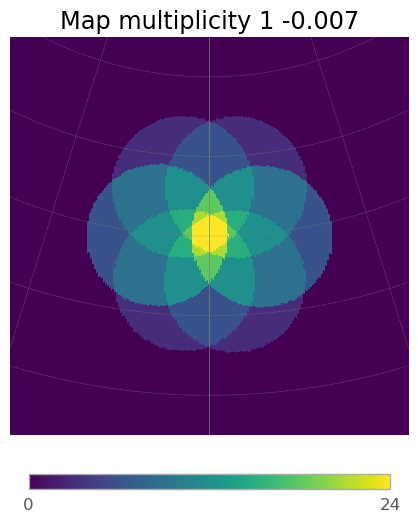

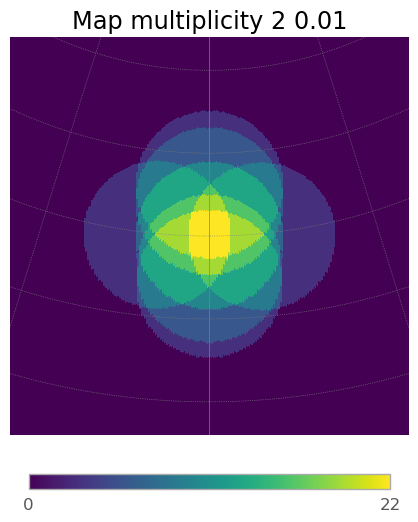

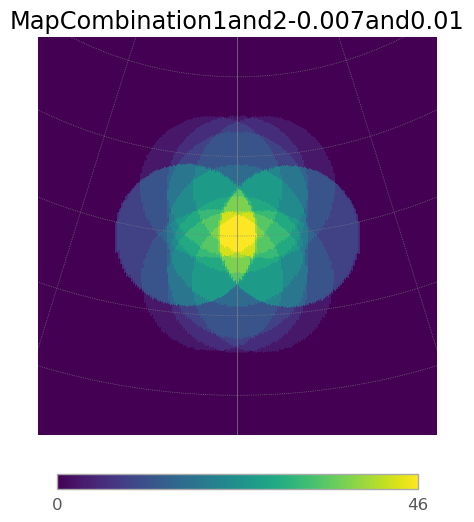

In [41]:
array_conv.divergent_pointing_2_div(tel_group_2=array_div, div1=-0.007, div2=0.01, az=0, alt=60)
array_conv.multiplicity_plot_2_div(array_div, subarray_mult_1=number_of_telescopes_subarray_3_first_half, subarray_mult_2=number_of_telescopes_subarray_3_second_half)

In [42]:
array_conv_2.table.units= "deg"
array_conv_2.table
array_div_2.table.units='deg'
array_div_2.table

id,x,y,z,az,alt,zn,focal,radius,fov,p_x,p_y,p_z,d_tel
,m,m,m,deg,deg,deg,m,deg,deg2,,,,m
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,-7.75,0.0,22.5,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,6.92
2,415.67,402.0,12.42,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,579.22
3,415.67,-402.0,27.92,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,579.10
4,429.33,0.0,16.08,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,430.57
5,-415.67,-402.0,48.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,577.91
6,-415.67,402.0,15.58,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,577.50
7,-429.67,0.0,29.42,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,428.54


1it [00:00,  6.83it/s]

The az where it is pointing is: 6.524046253092685
The az where it is pointing is: 2.9020786097963454


3it [00:00,  6.76it/s]

The az where it is pointing is: 357.0979213902037
The az where it is pointing is: 353.4759537469073


5it [00:00,  6.82it/s]

The az where it is pointing is: 356.3264377596333
The az where it is pointing is: 3.6735622403667447


6it [00:00,  6.81it/s]
7it [00:00,  7.18it/s]
6it [00:00,  6.62it/s]


12.514095936230444


7it [00:01,  6.99it/s]


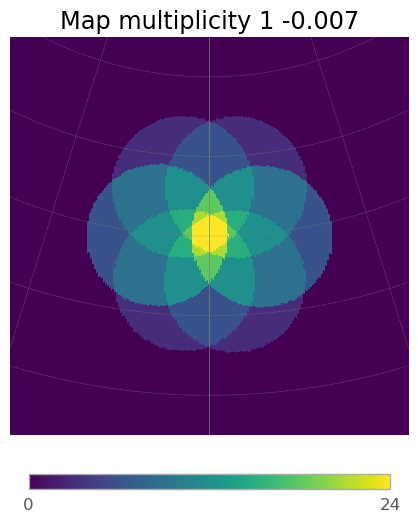

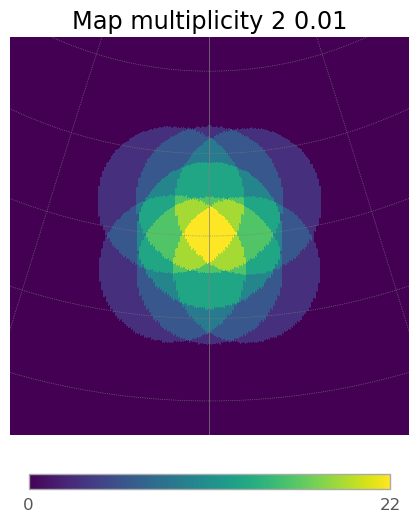

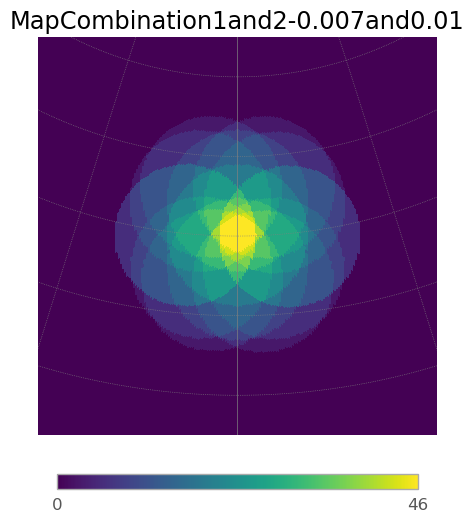

In [43]:
array_conv_2.divergent_pointing_2_div(tel_group_2=array_div_2, div1=-0.007, div2=0.01, az=0, alt=60)
array_conv_2.multiplicity_plot_2_div(array_div_2, subarray_mult_1=number_of_telescopes_subarray_4_first_half, subarray_mult_2=number_of_telescopes_subarray_4_second_half)

<SkyCoord (AltAz: obstime=2025-02-06T15:00:46.773, location=(1946635.7979987, -5467633.94561753, -2642498.5212285) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    [(0., 70.), (0., 70.), (0., 70.), (0., 70.), (0., 70.), (0., 70.)]>
the coord_2 are: <SkyCoord (AltAz: obstime=2025-02-06T15:00:46.773, location=(1946635.7979987, -5467633.94561753, -2642498.5212285) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    [(0., 70.), (0., 70.), (0., 70.), (0., 70.), (0., 70.), (0., 70.),
     (0., 70.)]>


6it [00:00,  6.66it/s]
7it [00:01,  6.78it/s]


<SkyCoord (AltAz: obstime=2025-02-06T15:00:46.773, location=(1946635.7979987, -5467633.94561753, -2642498.5212285) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    [(0., 70.), (0., 70.), (0., 70.), (0., 70.), (0., 70.), (0., 70.)]>
the coord_2 are: <SkyCoord (AltAz: obstime=2025-02-06T15:00:46.773, location=(1946635.7979987, -5467633.94561753, -2642498.5212285) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    [(0., 70.), (0., 70.), (0., 70.), (0., 70.), (0., 70.), (0., 70.),
     (0., 70.)]>


6it [00:00,  6.78it/s]
7it [00:01,  6.93it/s]
1it [00:00,  6.94it/s]

The az where it is pointing is: 0.0
The az where it is pointing is: 0.0


3it [00:00,  7.04it/s]

The az where it is pointing is: 0.0
The az where it is pointing is: 0.0


5it [00:00,  7.02it/s]

The az where it is pointing is: 0.0
The az where it is pointing is: 0.0


6it [00:00,  7.02it/s]
7it [00:01,  6.96it/s]
6it [00:00,  6.65it/s]


9.450044810959682


7it [00:01,  6.50it/s]


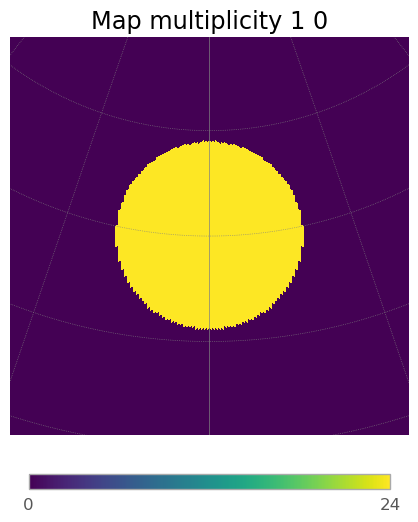

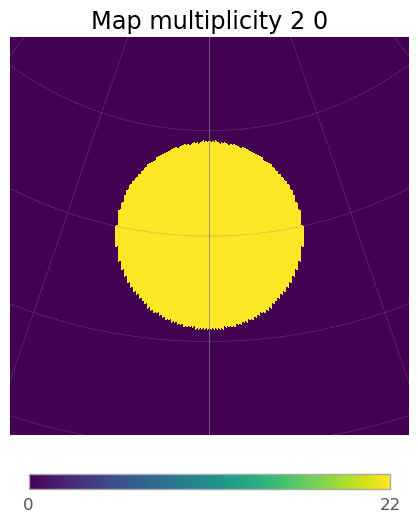

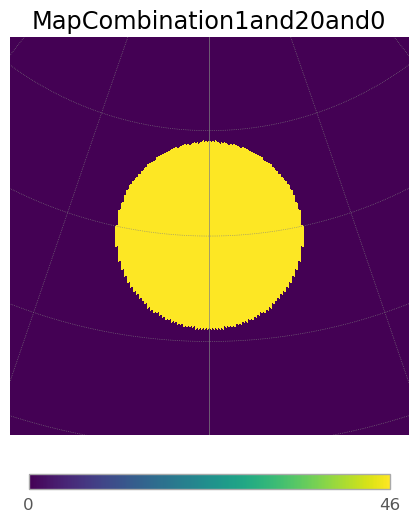

In [44]:
array_conv_2.divergent_pointing_2_div(tel_group_2=array_div_2, div1=0, div2=0, az=0, alt=70)
FoV=array_conv_2.hFoV_for_2_arrays(array_2=array_div_2, subarray_mult=number_of_telescopes_subarray_4_first_half, subarray_mult_2=number_of_telescopes_subarray_4_second_half)[0]
multiplicity=array_conv_2.hFoV_for_2_arrays(array_2=array_div_2, subarray_mult=number_of_telescopes_subarray_4_first_half, subarray_mult_2=number_of_telescopes_subarray_4_second_half)[1]
array_conv_2.multiplicity_plot_2_div(array_div_2, subarray_mult_1=number_of_telescopes_subarray_4_first_half, subarray_mult_2=number_of_telescopes_subarray_4_second_half)

In [45]:
multiplicity

46.0

In [46]:
div_too_much=np.linspace(0,0.014, 5)
div=np.linspace(0,0.014, 20)

<SkyCoord (AltAz: obstime=2025-02-06T15:00:46.773, location=(1946635.7979987, -5467633.94561753, -2642498.5212285) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    [(0., 70.), (0., 70.), (0., 70.), (0., 70.), (0., 70.), (0., 70.)]>
the coord_2 are: <SkyCoord (AltAz: obstime=2025-02-06T15:00:46.773, location=(1946635.7979987, -5467633.94561753, -2642498.5212285) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    [(0., 70.), (0., 70.), (0., 70.), (0., 70.), (0., 70.), (0., 70.),
     (0., 70.)]>


6it [00:00,  6.73it/s]
7it [00:00,  7.17it/s]


<SkyCoord (AltAz: obstime=2025-02-06T15:00:46.773, location=(1946635.7979987, -5467633.94561753, -2642498.5212285) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    [(0., 70.), (0., 70.), (0., 70.), (0., 70.), (0., 70.), (0., 70.)]>
the coord_2 are: <SkyCoord (AltAz: obstime=2025-02-06T15:00:46.773, location=(1946635.7979987, -5467633.94561753, -2642498.5212285) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    [(0., 70.), (0., 70.), (0., 70.), (0., 70.), (0., 70.), (0., 70.),
     (0., 70.)]>


6it [00:00,  7.00it/s]
7it [00:00,  7.06it/s]
1it [00:00,  7.34it/s]

The az where it is pointing is: 0.0
The az where it is pointing is: 0.0


3it [00:00,  7.14it/s]

The az where it is pointing is: 0.0
The az where it is pointing is: 0.0


5it [00:00,  6.88it/s]

The az where it is pointing is: 0.0
The az where it is pointing is: 0.0


6it [00:00,  7.00it/s]
7it [00:00,  7.23it/s]
6it [00:00,  6.76it/s]


9.450044810959682


7it [00:00,  7.19it/s]


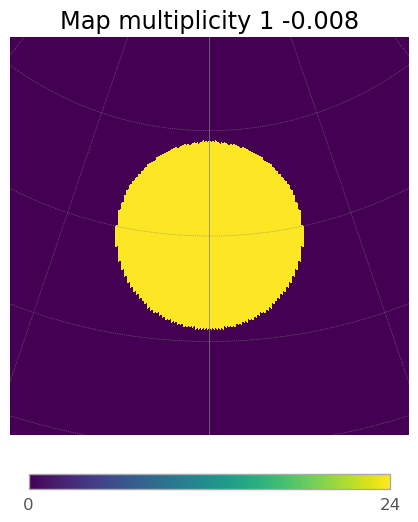

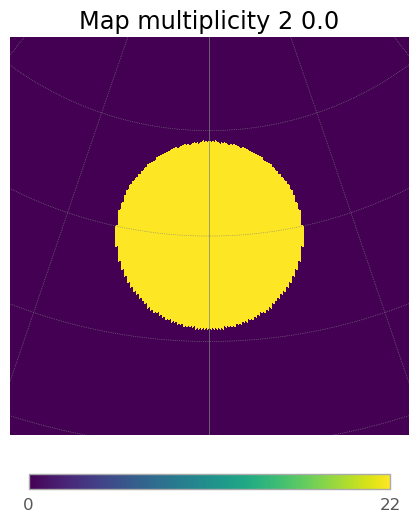

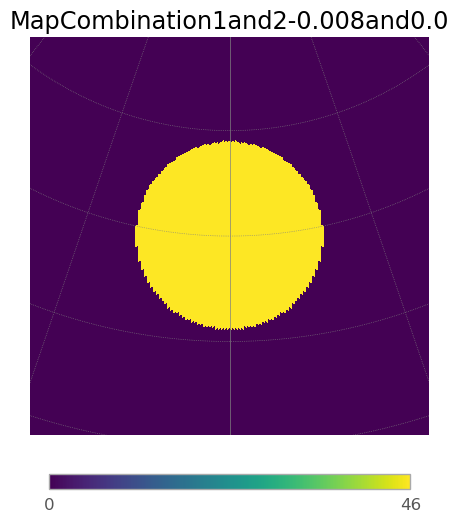

<SkyCoord (AltAz: obstime=2025-02-06T15:00:46.773, location=(1946635.7979987, -5467633.94561753, -2642498.5212285) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    [( 10.81718793, 69.68308746), (  4.52349314, 66.42852685),
     (355.47650686, 66.35838472), (349.18281207, 69.6136817 ),
     (353.28172507, 73.60838507), (  6.71827493, 73.61849651)]>
the coord_2 are: <SkyCoord (AltAz: obstime=2025-02-06T15:00:46.773, location=(1946635.7979987, -5467633.94561753, -2642498.5212285) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    [( -0.        , 70.00231354), (359.50821155, 69.83235795),
     (  0.49178845, 69.8346116 ), ( -0.        , 69.82816533),
     (  0.50067542, 70.16731058), (359.49932458, 70.16262595),
     ( -0.        , 70.17087467)]>


6it [00:00,  6.63it/s]
7it [00:00,  7.01it/s]


<SkyCoord (AltAz: obstime=2025-02-06T15:00:46.773, location=(1946635.7979987, -5467633.94561753, -2642498.5212285) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    [( 10.81718793, 69.68308746), (  4.52349314, 66.42852685),
     (355.47650686, 66.35838472), (349.18281207, 69.6136817 ),
     (353.28172507, 73.60838507), (  6.71827493, 73.61849651)]>
the coord_2 are: <SkyCoord (AltAz: obstime=2025-02-06T15:00:46.773, location=(1946635.7979987, -5467633.94561753, -2642498.5212285) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    [( -0.        , 70.00231354), (359.50821155, 69.83235795),
     (  0.49178845, 69.8346116 ), ( -0.        , 69.82816533),
     (  0.50067542, 70.16731058), (359.49932458, 70.16262595),
     ( -0.        , 70.17087467)]>


6it [00:00,  6.54it/s]
7it [00:00,  7.11it/s]
1it [00:00,  7.08it/s]

The az where it is pointing is: 10.817187934009866
The az where it is pointing is: 4.523493135608541


3it [00:00,  6.97it/s]

The az where it is pointing is: 355.47650686439147
The az where it is pointing is: 349.1828120659901


5it [00:00,  6.97it/s]

The az where it is pointing is: 353.28172507298723
The az where it is pointing is: 6.718274927012746


6it [00:00,  6.96it/s]
7it [00:01,  6.92it/s]
6it [00:00,  7.02it/s]


13.071712268738858


5it [00:00,  5.88it/s]


KeyboardInterrupt: 

In [47]:
#sstart with -0.009 until -0.006 with 30 steps so we do a new linspace
#see what div but aswell arrive to 0.0143 but as well 30 of them
#It would be a good idea to change the name of 
div=np.linspace(0,0.014, 20) #Diverges 
div_2=np.linspace(-0.0080,-0.0035,5) #Converges
FoV_array=[]
sum_div=[]
multiplicity_array=[]
for divergence_2 in div_2:# This is the one of convergence
    for divergence in div:  #This is the one that diverges        
        array_conv_2.divergent_pointing_2_div(tel_group_2=array_div_2, div1=divergence_2, div2=divergence, az=0, alt=70)
        FoV=array_conv_2.hFoV_for_2_arrays(array_2=array_div_2, subarray_mult=number_of_telescopes_subarray_4_first_half, subarray_mult_2=number_of_telescopes_subarray_4_second_half)[0]
        multiplicity=array_conv_2.hFoV_for_2_arrays(array_2=array_div_2, subarray_mult=number_of_telescopes_subarray_4_first_half, subarray_mult_2=number_of_telescopes_subarray_4_second_half)[1]
        if FoV > 63:
            FoV_array.append(FoV)
            multiplicity_array.append(multiplicity)
        array_conv_2.multiplicity_plot_2_div(array_div_2, subarray_mult_1=number_of_telescopes_subarray_4_first_half, subarray_mult_2=number_of_telescopes_subarray_4_second_half)
           
        #sum_div.append(_sum) THIS WAS AN IDEA TO PUT BOTH DIVERGENCES TOGETHER BUT MEH
        
   

In [ ]:
best_one_div=0.007
best_one_conv=-0.0575
second_best_div=0.0105
second_best_conv=-0.06875
not_enough_conv=-0.008
not_enough_div=0.0035
too_conv=-0.008
too_div=0.0035

In [ ]:
#BEST_ONE_CONV
FoV_array_best=[]
multiplicity_array_best=[]
for divergence in div:  #This is the one that diverges        
    array_conv_2.divergent_pointing_2_div(tel_group_2=array_div_2, div1=-0.00575, div2=divergence, az=0, alt=70)
    FoV=array_conv_2.hFoV_for_2_arrays(array_2=array_div_2, subarray_mult=number_of_telescopes_subarray_4_first_half, subarray_mult_2=number_of_telescopes_subarray_4_second_half)[0]
    multiplicity=array_conv_2.hFoV_for_2_arrays(array_2=array_div_2, subarray_mult=number_of_telescopes_subarray_4_first_half, subarray_mult_2=number_of_telescopes_subarray_4_second_half)[1]
    FoV_array_best.append(FoV)
    multiplicity_array_best.append(multiplicity)
    array_conv_2.multiplicity_plot_2_div(array_div_2, subarray_mult_1=number_of_telescopes_subarray_4_first_half, subarray_mult_2=number_of_telescopes_subarray_4_second_half)


In [ ]:
#second best
div=np.linspace(0,0.014, 20)
FoV_second_best=[]
multiplicity_second_best=[]
for divergence in div:  #This is the one that diverges        
    array_conv_2.divergent_pointing_2_div(tel_group_2=array_div_2, div1=-0.006875, div2=divergence, az=0, alt=70)
    FoV=array_conv_2.hFoV_for_2_arrays(array_2=array_div_2, subarray_mult=number_of_telescopes_subarray_4_first_half, subarray_mult_2=number_of_telescopes_subarray_4_second_half)[0]
    multiplicity=array_conv_2.hFoV_for_2_arrays(array_2=array_div_2, subarray_mult=number_of_telescopes_subarray_4_first_half, subarray_mult_2=number_of_telescopes_subarray_4_second_half)[1]
    FoV_second_best.append(FoV)
    multiplicity_second_best.append(multiplicity)
    array_conv_2.multiplicity_plot_2_div(array_div_2, subarray_mult_1=number_of_telescopes_subarray_4_first_half, subarray_mult_2=number_of_telescopes_subarray_4_second_half)


In [ ]:
#NOT ENOUGH DIV 
FoV_not_enough=[]
multiplicity_not_enough=[]
for divergence in div:  #This is the one that diverges        
    array_conv_2.divergent_pointing_2_div(tel_group_2=array_div_2, div1=-0.0035, div2=divergence, az=0, alt=70)
    FoV=array_conv_2.hFoV_for_2_arrays(array_2=array_div_2, subarray_mult=number_of_telescopes_subarray_4_first_half, subarray_mult_2=number_of_telescopes_subarray_4_second_half)[0]
    multiplicity=array_conv_2.hFoV_for_2_arrays(array_2=array_div_2, subarray_mult=number_of_telescopes_subarray_4_first_half, subarray_mult_2=number_of_telescopes_subarray_4_second_half)[1]
    FoV_not_enough.append(FoV)
    multiplicity_not_enough.append(multiplicity)
    array_conv_2.multiplicity_plot_2_div(array_div_2, subarray_mult_1=number_of_telescopes_subarray_4_first_half, subarray_mult_2=number_of_telescopes_subarray_4_second_half)


In [ ]:
#TOO MUCH 
conv=np.linspace(-0.0080,-0.0015, 20)
FoV_too_much=[]
multiplicity_too_much=[]
for convergence in conv:  #This is the one that diverges        
    array_conv_2.divergent_pointing_2_div(tel_group_2=array_div_2, div1=convergence, div2=0.0035, az=0, alt=70)
    FoV=array_conv_2.hFoV_for_2_arrays(array_2=array_div_2, subarray_mult=number_of_telescopes_subarray_4_first_half, subarray_mult_2=number_of_telescopes_subarray_4_second_half)[0]
    multiplicity=array_conv_2.hFoV_for_2_arrays(array_2=array_div_2, subarray_mult=number_of_telescopes_subarray_4_first_half, subarray_mult_2=number_of_telescopes_subarray_4_second_half)[1]
    FoV_too_much.append(FoV)
    multiplicity_too_much.append(multiplicity)
    array_conv_2.multiplicity_plot_2_div(array_div_2, subarray_mult_1=number_of_telescopes_subarray_4_first_half, subarray_mult_2=number_of_telescopes_subarray_4_second_half)


In [ ]:
full_array = LoadConfig("/Users/macbook/divtel/Paranal_only_SST.txt", frame=cta)

In [ ]:

FoV_full_array=[]
multiplicity_full_array=[]

div_full_array=np.linspace(0,0.008, 5)
for divergence in div_full_array:  #This is the one that diverges        
    full_array.divergent_pointing(div=divergence, az=0, alt=70)
    FoV=full_array.hFoV(m_cut=3)[0]
    multiplicity=full_array.hFoV(m_cut=3)[1]
    FoV_full_array.append(FoV)
    multiplicity_full_array.append(multiplicity)
    full_array.multiplicity_plot()


In [ ]:
conv=np.linspace(-0.0080,-0.0015, 20)
FoV_second_best_conv=[]
multiplicity_second_best_conv=[]
for convergence in conv:  #This is the one that diverges        
    array_conv_2.divergent_pointing_2_div(tel_group_2=array_div_2, div1=convergence, div2=0.0115, az=0, alt=70)
    FoV=array_conv_2.hFoV_for_2_arrays(array_2=array_div_2, subarray_mult=number_of_telescopes_subarray_4_first_half, subarray_mult_2=number_of_telescopes_subarray_4_second_half)[0]
    multiplicity=array_conv_2.hFoV_for_2_arrays(array_2=array_div_2, subarray_mult=number_of_telescopes_subarray_4_first_half, subarray_mult_2=number_of_telescopes_subarray_4_second_half)[1]
    FoV_second_best_conv.append(FoV)
    multiplicity_second_best_conv.append(multiplicity)
    array_conv_2.multiplicity_plot_2_div(array_div_2, subarray_mult_1=number_of_telescopes_subarray_4_first_half, subarray_mult_2=number_of_telescopes_subarray_4_second_half)


In [ ]:
FoV_second_best_conv=[]
multiplicity_second_best_conv=[]
for convergence in conv:  #This is the one that diverges        
    array_conv_2.divergent_pointing_2_div(tel_group_2=array_div_2, div1=convergence, div2=0.0115, az=0, alt=70)
    FoV=array_conv_2.hFoV_for_2_arrays(array_2=array_div_2, subarray_mult=number_of_telescopes_subarray_4_first_half, subarray_mult_2=number_of_telescopes_subarray_4_second_half)[0]
    multiplicity=array_conv_2.hFoV_for_2_arrays(array_2=array_div_2, subarray_mult=number_of_telescopes_subarray_4_first_half, subarray_mult_2=number_of_telescopes_subarray_4_second_half)[1]
    FoV_second_best_conv.append(FoV)
    multiplicity_second_best_conv.append(multiplicity)
    array_conv_2.multiplicity_plot_2_div(array_div_2, subarray_mult_1=number_of_telescopes_subarray_4_first_half, subarray_mult_2=number_of_telescopes_subarray_4_second_half)


In [ ]:
array_conv_2.divergent_pointing(div=-0.007, az=0, alt=70)
array_conv_2.multiplicity_plot()

In [ ]:
array_conv_2.divergent_pointing_2_div(tel_group_2=array_div_2, div1=-0.007, div2=0.0115, az=0, alt=70)
array_conv_2.multiplicity_plot_2_div(array_div_2, subarray_mult_1=number_of_telescopes_subarray_4_first_half, subarray_mult_2=number_of_telescopes_subarray_4_second_half)

In [ ]:
array_conv_2.divergent_pointing_2_div(tel_group_2=array_div_2, div1=-0.007, div2=0.0115, az=0, alt=70)
FoV=array_conv_2.hFoV_for_2_arrays(array_2=array_div_2, subarray_mult=number_of_telescopes_subarray_4_first_half, subarray_mult_2=number_of_telescopes_subarray_4_second_half)[0]
multiplicity=array_conv_2.hFoV_for_2_arrays(array_2=array_div_2, subarray_mult=number_of_telescopes_subarray_4_first_half, subarray_mult_2=number_of_telescopes_subarray_4_second_half)[1]
print(f"FoV {FoV}")
print(f"Multiplicity {multiplicity}")
multiplicity_second_best_conv.append(multiplicity)
array_conv_2.multiplicity_plot_2_div(array_div_2, subarray_mult_1=number_of_telescopes_subarray_4_first_half, subarray_mult_2=number_of_telescopes_subarray_4_second_half)





In [ ]:
array_conv_2.divergent_pointing_2_div(tel_group_2=array_div_2, div1=0.01, div2=0.0115, az=0, alt=70)
array_conv_2.table

In [ ]:
array_conv_2.divergent_pointing_2_div(tel_group_2=array_div_2, div1=-0.01, div2=0.0115, az=0, alt=70)
array_conv_2.table

In [ ]:
array_div_2.table

In [ ]:
array_conv_2.divergent_pointing_2_div(tel_group_2=array_div_2, div1=-0.008, div2=0.0115, az=0, alt=70)
FoV=array_conv_2.hFoV_for_2_arrays(array_2=array_div_2, subarray_mult=number_of_telescopes_subarray_4_first_half, subarray_mult_2=number_of_telescopes_subarray_4_second_half)[0]
multiplicity=array_conv_2.hFoV_for_2_arrays(array_2=array_div_2, subarray_mult=number_of_telescopes_subarray_4_first_half, subarray_mult_2=number_of_telescopes_subarray_4_second_half)[1]
print(f"FoV {FoV}")
print(f"Multiplicity {multiplicity}")
multiplicity_second_best_conv.append(multiplicity)
array_conv_2.multiplicity_plot_2_div(array_div_2, subarray_mult_1=number_of_telescopes_subarray_4_first_half, subarray_mult_2=number_of_telescopes_subarray_4_second_half)



In [ ]:
array_conv_2.divergent_pointing(div=-0.00005, az=0, alt=70)
array_conv_2.multiplicity_plot()

In [ ]:
full_array.divergent_pointing(div=-0.09, az=0, alt=70)
FoV=full_array.hFoV(m_cut=3)[0]
multiplicity=full_array.hFoV(m_cut=3)[1]
print(f"FoV {FoV}")
print(f"Multiplicity {multiplicity}")
full_array.multiplicity_plot()

In [ ]:
full_array.divergent_pointing(div=0.009, az=0, alt=70)
FoV=full_array.hFoV(m_cut=3)[0]
multiplicity=full_array.hFoV(m_cut=3)[1]
print(f"FoV {FoV}")
print(f"Multiplicity {multiplicity}")
full_array.multiplicity_plot()

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(20,12)) 
# Plot Full Array
# Full Array with m_cut = 3
l1=axes[0,0].plot(div_full_array, FoV_full_array, label='FoV', marker='o', color='darkgreen')
ax2 = axes[0,0].twinx()
l2=ax2.plot(div_full_array, multiplicity_full_array, label='Multiplicities',marker='*', color='limegreen')
axes[0,0].set_title('Full Array m_cut 3')
axes[0,0].set_xlabel('Divergence')
axes[0,0].set_ylabel('Field of view (m > 3) [deg$^2$]')
ax2.set_ylabel('Multiplicities (m>3)')
axeslegend = l1+l2
axes[0,0].legend(axeslegend, [l.get_label() for l in axeslegend])



#Plot the ones for subarray second best
l1=axes[0,1].plot(div, FoV_second_best, label='FoV',marker='o', color='darkgreen')
ax5=axes[0,1].twinx()
l2=ax5.plot(div, multiplicity_second_best, label='Multiplicity', marker='*', color='limegreen')
axes[0,1].set_title('SUBARRAY INTERSECTING TELESCOPE')
axes[0,1].set_xlabel('Divergence')
axes[0,1].set_ylabel('Field of view [deg$^2$]')
ax5.set_ylabel('Multiplicities')
axeslegend = l1+l2
axes[0,1].legend(axeslegend, [l.get_label() for l in axeslegend])
#Plot but changing the conv not div 


l1=axes[1,0].plot(conv, FoV_second_best_conv, label='FoV',marker='o', color='darkgreen')
ax5=axes[1,0].twinx()
l2=ax5.plot(conv, multiplicity_second_best_conv, label='Multiplicity', marker='*', color='limegreen')
axes[1,0].set_title('Configuration with Two dive with div=0.0115 and varying convergence')
axes[1,0].set_xlabel('Convergence')
axes[1,0].set_ylabel('Field of view [deg$^2$]')
ax5.set_ylabel('Multiplicities')
axeslegend = l1+l2
axes[1,0].legend(axeslegend, [l.get_label() for l in axeslegend])



l1=axes[1,1].plot(conv, FoV_too_much, label='FoV',marker='o', color='darkgreen')
ax5=axes[1,1].twinx()
l2=ax5.plot(conv, multiplicity_too_much, label='Multiplicity', marker='*', color='limegreen')
axes[1,1].set_title('SUBARRAY INTERSECTING TELESCOPE too much')
axes[1,1].set_xlabel('Divergence')
axes[1,1].set_ylabel('Field of view [deg$^2$]')
ax5.set_ylabel('Multiplicities')
axeslegend = l1+l2
axes[1,1].legend(axeslegend, [l.get_label() for l in axeslegend])




# Adjust layout
plt.tight_layout()



plt.show()

In [ ]:
#plt.plot( FoV_second_best, multiplicity_second_best, label='best',marker='o', color='darkgreen')
plt.plot( FoV_second_best_conv, multiplicity_second_best_conv, label='best_conv',marker='o', color='purple')
plt.plot( FoV_full_array,multiplicity_full_array, label='full',marker='o', color='limegreen')
#plt.plot( FoV_too_much,  multiplicity_too_much, label='too much', marker='o' )
plt.xlabel("FoV")
plt.ylabel("Multiplicity")
plt.legend()
plt.show()

In [142]:
array_conv_2.divergent_pointing_2_div(tel_group_2=array_div_2, div1=0.02, div2=0.0115, az=0, alt=70)

In [143]:
array_conv_2.divergent_pointing_2_div(tel_group_2=array_div_2, div1=0.02, div2=0.0115, az=0, alt=70)
array_conv_2.table

id,x,y,z,az,alt,zn,focal,radius,fov,p_x,p_y,p_z,d_tel
,m,m,m,deg,deg,deg,m,deg,deg2,,,,m
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,0.0,816.83,21.83,334.465,67.991,22.009,5.600,4.450,62.462,0.338,0.162,0.927,816.88
2,-840.0,404.67,16.75,335.052,78.422,11.578,5.600,4.450,62.462,0.182,0.085,0.980,932.41
3,-840.0,-404.67,55.92,24.948,78.516,11.484,5.600,4.450,62.462,0.181,-0.084,0.980,932.62
4,0.0,-816.83,65.42,25.535,68.175,21.825,5.600,4.450,62.462,0.335,-0.160,0.928,817.54
5,839.67,-404.67,17.75,9.019,61.140,28.860,5.600,4.450,62.462,0.477,-0.076,0.876,932.29
6,839.67,404.67,10.08,350.981,61.100,28.900,5.600,4.450,62.462,0.477,0.076,0.875,932.44


In [152]:
array_conv_2.divergent_pointing_2_div(tel_group_2=array_div_2, div1=-0.02, div2=0.0115, az=0, alt=70)
array_conv_2.table

id,x,y,z,az,alt,zn,focal,radius,fov,p_x,p_y,p_z,d_tel
,m,m,m,deg,deg,deg,m,deg,deg2,,,,m
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,0.0,816.83,21.83,25.537,68.073,21.927,5.600,4.450,62.462,0.337,-0.161,0.928,816.88
2,-840.0,404.67,16.75,9.019,61.283,28.717,5.600,4.450,62.462,0.475,-0.075,0.877,932.41
3,-840.0,-404.67,55.92,350.981,61.081,28.919,5.600,4.450,62.462,0.478,0.076,0.875,932.62
4,0.0,-816.83,65.42,334.463,67.888,22.112,5.600,4.450,62.462,0.340,0.162,0.926,817.54
5,839.67,-404.67,17.75,335.055,78.488,11.512,5.600,4.450,62.462,0.181,0.084,0.980,932.29
6,839.67,404.67,10.08,24.945,78.506,11.494,5.600,4.450,62.462,0.181,-0.084,0.980,932.44


the barycenter for the calculations[-0.67307692  0.         27.68615385]
the barycenter for the calculations of the second divergence[-0.67307692  0.         27.68615385]


6it [00:00,  6.59it/s]
7it [00:01,  6.74it/s]
6it [00:00,  6.17it/s]


11.301268200795306


7it [00:00,  7.23it/s]


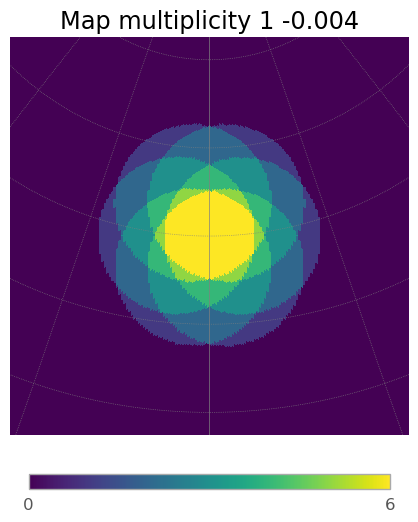

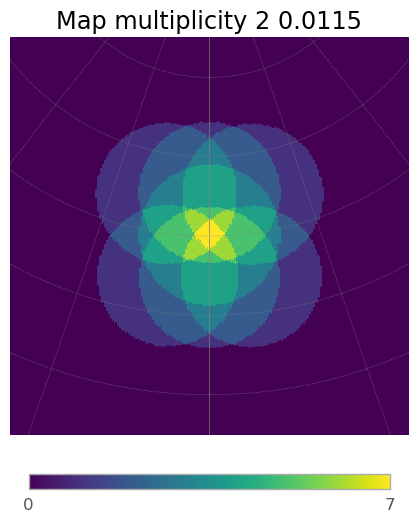

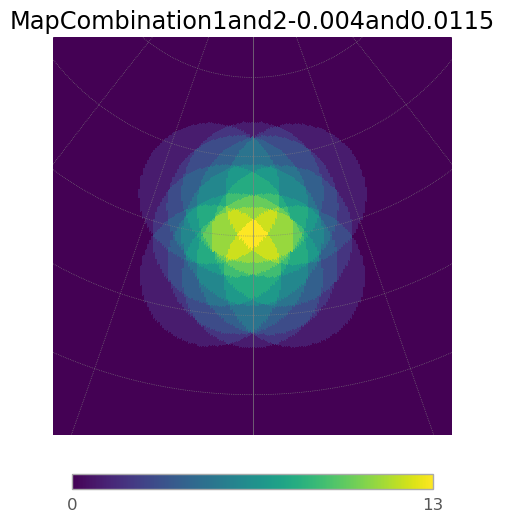

In [176]:
array_conv_2.divergent_pointing_2_div(tel_group_2=array_div_2,complete_array=array_SST_2_diff_div_try_2, div1=-0.004, div2=0.0115, az=0, alt=70)
array_conv_2.multiplicity_plot_2_div(array_div_2)
#array_conv_2.multiplicity_plot()

-6.283185307179586 rad
-6.127250176318986 rad
-0.15593513086060007 rad
-6.283185307179586 rad
-0.1180878813098194 rad
-6.165097425869767 rad
-6.283185307179586 rad


7it [00:01,  6.82it/s]
7it [00:01,  6.99it/s]


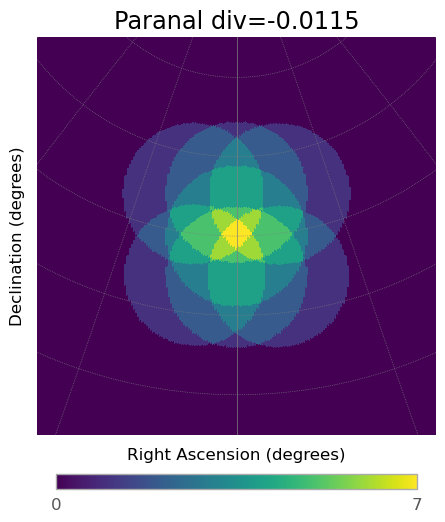

In [168]:
array_div_2.divergent_pointing(div=-0.0115, az=0, alt=70)
array_div_2.multiplicity_plot()

-1680.0 -1679.67 58.7033
-1680.0 -1679.67 3418.0433000000003
-1680.0 1679.67 58.7033
-1680.0 1679.67 3418.0433000000003
1679.3400000000001 -1679.67 58.7033
1679.3400000000001 -1679.67 3418.0433000000003
1679.3400000000001 1679.67 58.7033
1679.3400000000001 1679.67 3418.0433000000003
-859.34 -859.0 52.08
-859.34 -859.0 1770.0800000000002
-859.34 859.0 52.08
-859.34 859.0 1770.0800000000002
858.66 -859.0 52.08
858.66 -859.0 1770.0800000000002
858.66 859.0 52.08
858.66 859.0 1770.0800000000002


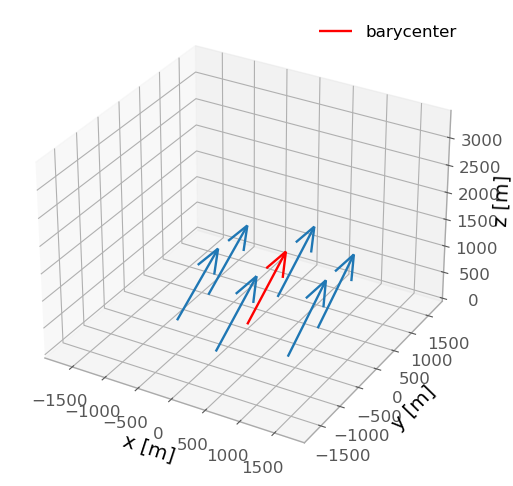

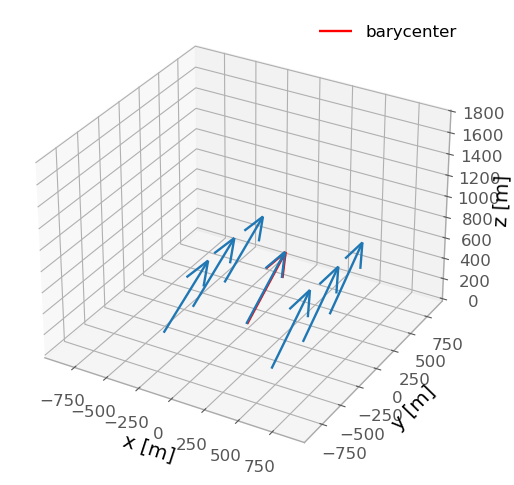

In [169]:
ax=array_conv_2.display("xyz")
ax_2 = array_div_2.display("xyz")
plt.show()

-1680.0 -1679.67 58.7033
-1680.0 -1679.67 3418.0433000000003
-1680.0 1679.67 58.7033
-1680.0 1679.67 3418.0433000000003
1679.3400000000001 -1679.67 58.7033
1679.3400000000001 -1679.67 3418.0433000000003
1679.3400000000001 1679.67 58.7033
1679.3400000000001 1679.67 3418.0433000000003
-859.34 -859.0 52.08
-859.34 -859.0 1770.0800000000002
-859.34 859.0 52.08
-859.34 859.0 1770.0800000000002
858.66 -859.0 52.08
858.66 -859.0 1770.0800000000002
858.66 859.0 52.08
858.66 859.0 1770.0800000000002


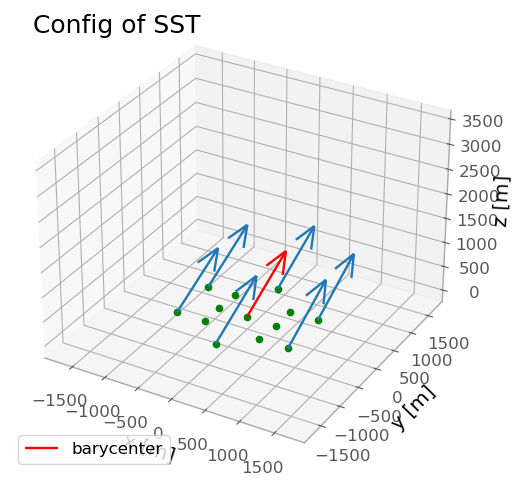

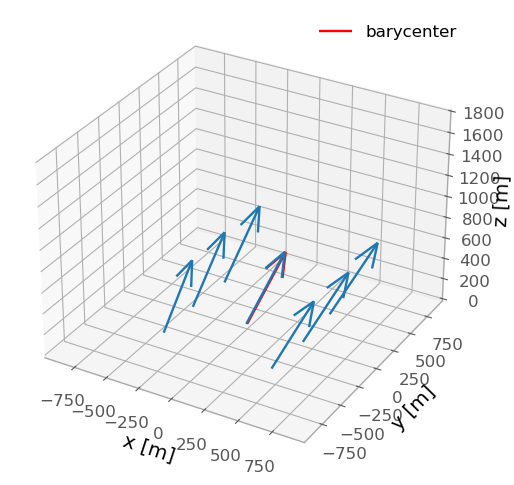

In [160]:
#array_alt_1.display("xyz")
#array_conv_2.divergent_pointing_2_div(tel_group_2=array_div_2, div1=-0.02, div2=0.02, az=0, alt=70)
#fig = plt.figure()
ax = array_conv_2.display("xyz")
ax_2 = array_div_2.display("xyz")
colors = [
    'lightseagreen' if np.isclose(fov, 14.5356) else
    'blueviolet' if np.isclose(fov, 46.707) else 
    'green' if np.isclose(fov, 62.462) else
    'red'  # Default color if none of the conditions match
    for fov in array.table["fov"]
]
fov_labels = {
    'lightseagreen': 'LST',
    'blueviolet': 'MST',
    'green': 'SST'
}
colors_2 = [
    'lightseagreen' if np.isclose(fov, 14.5356) else
    'blueviolet' if np.isclose(fov, 46.707) else 
    'green' if np.isclose(fov, 62.462) else
    'red'  # Default color if none of the conditions match
    for fov in array.table["fov"]
]
fov_labels_2 = {
    'lightseagreen': 'LST',
    'blueviolet': 'MST',
    'green': 'SST'
}
colors_3 = [
    'lightseagreen' if np.isclose(fov, 14.5356) else
    'blueviolet' if np.isclose(fov, 46.707) else 
    'green' if np.isclose(fov, 62.462) else
    'red'  # Default color if none of the conditions match
    for fov in array.table["fov"]
]
fov_labels_3 = {
    'lightseagreen': 'LST',
    'blueviolet': 'MST',
    'green': 'SST'
}

#array_3.display("xyz",color=c,label=label)

for i in range(len(array_conv_2.table)):
    # Color each telescope point according to the FoV
    ax.scatter(array_conv_2.table['x'][i], array_conv_2.table['y'][i], array_conv_2.table['z'][i], 
               color=colors[i], label=fov_labels[colors[i]])
for i in range(len(array_div_2.table)):
    # Color each telescope point according to the FoV
    ax.scatter(array_div_2.table['x'][i], array_div_2.table['y'][i], array_div_2.table['z'][i], 
               color=colors[i], label="violet")

# Display a legend with unique labels
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))

ax.legend(by_label.values(), by_label.keys(), loc='lower left')
ax.text2D(0.05, 0.95, "Config of SST ", 
          transform=ax.transAxes, fontsize=18)



plt.show()

In [ ]:
array_conv.divergent_pointing_2_div(tel_group_2=array_div, div1=-0.007, div2=0.01, az=0, alt=60)
array_conv.multiplicity_plot_2_div(array_div, subarray_mult_1=number_of_telescopes_subarray_3_first_half, subarray_mult_2=number_of_telescopes_subarray_3_second_half)

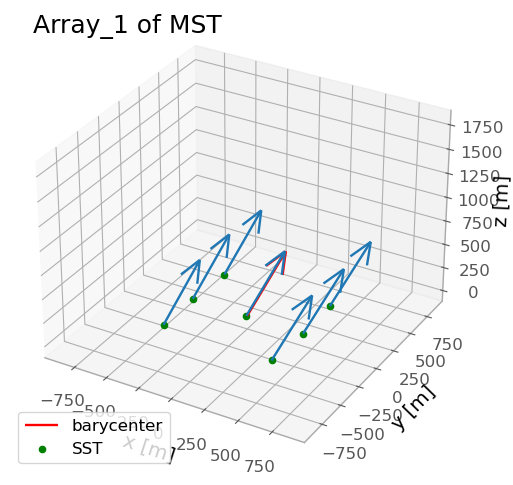

In [48]:
#array_alt_1.display("xyz")
#fig = plt.figure()
ax = array_div_2.display("xyz")
colors = [
    'lightseagreen' if np.isclose(fov, 14.5356) else
    'blueviolet' if np.isclose(fov, 46.707) else 
    'green' if np.isclose(fov, 62.462) else
    'red'  # Default color if none of the conditions match
    for fov in array.table["fov"]
]
fov_labels = {
    'lightseagreen': 'LST',
    'blueviolet': 'MST',
    'green': 'SST'
}
colors_2 = [
    'lightseagreen' if np.isclose(fov, 14.5356) else
    'blueviolet' if np.isclose(fov, 46.707) else 
    'green' if np.isclose(fov, 62.462) else
    'red'  # Default color if none of the conditions match
    for fov in array.table["fov"]
]
fov_labels_2 = {
    'lightseagreen': 'LST',
    'blueviolet': 'MST',
    'green': 'SST'
}
colors_3 = [
    'lightseagreen' if np.isclose(fov, 14.5356) else
    'blueviolet' if np.isclose(fov, 46.707) else 
    'green' if np.isclose(fov, 62.462) else
    'red'  # Default color if none of the conditions match
    for fov in array.table["fov"]
]
fov_labels_3 = {
    'lightseagreen': 'LST',
    'blueviolet': 'MST',
    'green': 'SST'
}

#array_3.display("xyz",color=c,label=label)

for i in range(len(array_div_2.table)):
    # Color each telescope point according to the FoV
    ax.scatter(array_div_2.table['x'][i], array_div_2.table['y'][i], array_div_2.table['z'][i], 
               color=colors[i], label=fov_labels[colors[i]])

# Display a legend with unique labels
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))

ax.legend(by_label.values(), by_label.keys(), loc='lower left')
ax.text2D(0.05, 0.95, "Array_1 of MST ", 
          transform=ax.transAxes, fontsize=18)


plt.show()

In [ ]:
## IN THE MULTIPLICITY PLOTS!!!! THERE IS A PROBLEM WITH THE POINTING THE PI!!!1